___
# Ciência dos Dados - PROJETO 2

___
## Nome 1 João Pedro Montefeltro Junqueira Meirelles

## Nome 2 Ester dos Santos Quintino

___

___

## 1. Problema

O Classificador Naive-Bayes, o qual se baseia no uso do teorema de Bayes, é largamente utilizado em filtros anti-spam de e-mails. O classificador permite calcular qual a probabilidade de uma mensagem ser SPAM considerando as palavras em seu conteúdo e, de forma complementar, permite calcular a probabilidade de uma mensagem ser HAM dada as palavras descritas na mensagem.

Para realizar o MVP (minimum viable product) do projeto, você precisa programar uma versão do classificador que "aprende" o que é uma mensagem SPAM considerando uma base de treinamento e comparar o desempenho dos resultados com uma base de testes. 


___
## 2. Separação da base de dados em Treinamento e Teste

A base de dados deve ser separada em duas partes, aleatoriamente, considerando: 
    
    75% dos dados para a parte Treinamento; e
    25% dos dados para a parte Teste.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as jeca
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\furyo\Desktop\CDDP-P2


# Lendo a base de dados

In [3]:
dados = pd.read_excel('spamham.xlsx')
dados = dados.iloc[np.random.permutation(len(dados))]

In [4]:
num = len(dados.Email)
setenta_cinco = int(num*0.75)

___
## 3. Classificador Naive-Bayes

# Limpeza das mensagens e remoção dos caracteres que não afetam a classificação

In [5]:
arranca = [':',',','"','/',';','.','=','+','(',')','*']
for i in range(num):
    dados.Email[i:i+1] = dados.Email[i:i+1].str.replace('  ',' ') # Mudança de 2 espaços para 1
    for j in arranca:
        dados.Email[i:i+1] = dados.Email[i:i+1].str.replace(j,'') 

dados.Email

2432    Indians r poor but India is not a poor country...
760     Romantic Paris 2 nights 2 flights from å£79 Bo...
168     Great escape I fancy the bridge but needs her ...
469           There are many company Tell me the language
4946    Great News! Call FREEFONE 08006344447 to claim...
4561                            How much u trying to get?
3869          Oh ok wait 4 me there My lect havent finish
2301                         We can make a baby in yo tho
1854      Kyou are the only girl waiting in reception ah?
248     It didnt work again oh Ok goodnight then Ill f...
3166    When people see my msgs They think Iam addicte...
4322                          Aight well keep me informed
1541    Do u konw waht is rael FRIENDSHIP Im gving yuo...
959                                               Where @
1119    Bored of speed dating? Try SPEEDCHAT txt SPEED...
792     Y?WHERE U AT DOGBREATH? ITS JUST SOUNDING LIKE...
4262    Den only weekdays got special price Haiz Cant ...
422           

# Separação da base de dados em Treinamento e Teste na fração 3 para 1.

In [6]:
#75% dos dados para a parte Treinamento.
#25% dos dados para a parte Teste.

dados_treino = dados.iloc[:setenta_cinco]
dados_teste = dados.iloc[setenta_cinco:num]
dados_reais = dados.iloc[setenta_cinco:num]


# Probabilidade de  uma mensagem ser SPAM e Probabilidade de uma mensagem ser HAM

In [7]:
dados_teste = dados_teste.Email.values #Values retorna uma lista com os emails.

Spam = dados_treino.Email[dados_treino.Class == 'spam'].values
Ham = dados_treino.Email[dados_treino.Class == 'ham'].values

# Probabilidade de uma mensagem ser SPAM:

Pspam = (dados_treino.Email[dados_treino.Class == 'spam'].count()/dados_treino.Email.count())

# Probabilidade de uma mensagem ser HAM:

Pham = (dados_treino.Email[dados_treino.Class == 'ham'].count()/dados_treino.Email.count())

# Criação de uma lista que armazena as palavras do email

In [8]:
#SPAM
spam_words = []
ham_words = []
i = 0
while i < len(Spam):
    word = Spam[i].split()
    for j in word:
        if j.isdigit == True:
            pass
        if len(j) <= 3:
            pass
        else:
            spam_words.append(j)
    i+=1

In [9]:
#HAM
i = 0
while i < len(Ham):
    word = Ham[i].split()
    for j in word:
        if j.isdigit == True:
            pass
        if len(j) <= 3:
            pass
        else:
            ham_words.append(j)
    i+=1

# Criação de um dicionário 

In [10]:
spam_dic = {}
for i in spam_words:
    n = 1
    if i in spam_dic:
        pass
    else:   
        for j in spam_words:
            if i == j:
                n += 1
            else:
                pass
        spam_dic[i] = (n + 1)/(len(spam_words)*2 + len(ham_words))
ham_dic = {}
for i in ham_words:
    n = 1
    if i in ham_dic:
        pass
    else:   
        for j in ham_words:
            if i == j:
                n += 1
            else:
                pass
        ham_dic[i] = (n + 1)/(len(ham_words)*2 + len(spam_words))

# CLassificação

In [11]:
def classificando(emails,spam,ham,Pspam,Pham,roc):
    classificados = {} #Devolve se o email é SPAM ou se o email é HAM
    for emailss in emails:
        pspam = Pspam
        pham = Pham
        email = str(emailss).split()
        
        for w in email: #probabilidade de uma palavra acontecer se a mensagem na base treinamento é considerada SPAM e HAM.
            if w in spam:
                pspam = pspam*spam[w]
            elif w in ham:
                pham = pham*ham[w]
            else:
                pspam = pspam + ()
        if pspam > roc*(pspam + pham):
            classificados[emailss] = 'spam'
        else:
            classificados[emailss] = 'ham'
    return classificados

In [12]:
# Reestruturação dos dados teste
teste = []
for i in dados_teste:
    teste.append(i)
dados_teste = teste

In [13]:
#Guardando classificados e probabilidades em variáveis
roc = 0.5
tudo_certo = classificando(dados_teste,spam_dic,ham_dic,Pspam,Pham,roc)
tudo_certo

{'Ok c Ì_ then': 'ham',
 "Yep at derek's house now see you Sunday &lt3": 'spam',
 'FreeMSG You have been awarded a FREE mini DIGITAL CAMERA just reply SNAP to collect your prize! quizclub Opt out? Stop 80122300pwk SPRWM Ph08704050406': 'ham',
 'Ho ho - big belly laugh! See ya tomo': 'spam',
 "Living is very simple Loving is also simple Laughing is too simple Winning is tooo simple But being 'SIMPLE' is very difficult Gud nte-": 'spam',
 '7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \\Ur Lovely Friendship\\ good morning dear': 'spam',
 'Lol please do Actually send a pic of yourself right now I wanna see Pose with a comb and hair dryer or something': 'spam',
 'No but the bluray player can': 'ham',
 'Hi mate its RV did u hav a nice hol just a message 3 say hello coz havenåÕt sent u 1 in ages started driving so stay off roads!RVx': 'spam',
 'Urgent UR awarded a complimentary trip to EuroDisinc Trav Aco&Entry41 Or å£1000 To clai

In [14]:
# Lista com apenas spam's e ham's
results = []
for i in dados_teste:
    results.append(tudo_certo[i])

In [15]:
df_meus = pd.DataFrame({
    'Class' : results,
    'Emails' : dados_teste
})

In [16]:
valores_reais = dados_reais.Class.values

In [17]:
df_comp = pd.DataFrame({
    'Minhas' : results,
    'Reais' : valores_reais
})

In [18]:
# % de acertos
spam_spam = df_comp.Minhas[(df_comp.Minhas == 'spam') & (df_comp.Reais == 'spam')].count()
spam_ham = df_comp.Minhas[(df_comp.Minhas == 'spam') & (df_comp.Reais == 'ham')].count()
ham_ham = df_comp.Minhas[(df_comp.Minhas == 'ham') & (df_comp.Reais == 'ham')].count()
ham_spam = df_comp.Minhas[(df_comp.Minhas == 'ham') & (df_comp.Reais == 'spam')].count()

In [19]:
print(pd.crosstab(df_comp.Reais,df_comp.Minhas))

Minhas  ham  spam
Reais            
ham     203  1001
spam    169    20


## 4. Curva ROC

In [20]:
def reclass(dados_teste,spam_dic,ham_dic,Pspam,Pham,roc):
    tudo_certo = classificando(dados_teste,spam_dic,ham_dic,Pspam,Pham,roc)
    results = []
    for i in dados_teste:
        results.append(tudo_certo[i])
    df_meus = pd.DataFrame({
        'Class' : results,
        'Emails' : dados_teste
    })
    valores_reais = dados_reais.Class.values
    df_comp = pd.DataFrame({
        'Minhas' : results,
        'Reais' : valores_reais
    })
    spam_spam = df_comp.Minhas[(df_comp.Minhas == 'spam') & (df_comp.Reais == 'spam')].count()
    spam_ham = df_comp.Minhas[(df_comp.Minhas == 'spam') & (df_comp.Reais == 'ham')].count()
    ham_ham = df_comp.Minhas[(df_comp.Minhas == 'ham') & (df_comp.Reais == 'ham')].count()
    ham_spam = df_comp.Minhas[(df_comp.Minhas == 'ham') & (df_comp.Reais == 'spam')].count()

    return df_comp, spam_spam, spam_ham, ham_ham, ham_spam


In [21]:
r = np.arange(0,1,0.001)
sensibilidade = []
especificidade = []
lista_SV = []
lista_SF = []
lista_HV = []
lista_HF = []

for roca in r:
    df_comp, spam_spam, spam_ham, ham_ham, ham_spam = reclass(dados_teste,spam_dic,ham_dic,Pspam,Pham,roca)
    curva_intel_verdadeiro = spam_spam/(spam_spam + spam_ham)
    curva_intel_falso = ham_ham/(ham_ham + ham_spam)
    sensibilidade.append(curva_intel_verdadeiro)
    especificidade.append(curva_intel_falso)
    lista_SV.append(spam_spam)
    lista_SF.append(spam_ham)
    lista_HV.append(ham_ham)
    lista_HF.append(ham_spam)
    print(pd.crosstab(df_comp.Reais,df_comp.Minhas))
    print('\n')

Minhas  spam
Reais       
ham     1204
spam     189


Minhas  ham  spam
Reais            
ham      47  1157
spam    155    34


Minhas  ham  spam
Reais            
ham      55  1149
spam    156    33


Minhas  ham  spam
Reais            
ham      66  1138
spam    156    33


Minhas  ham  spam
Reais            
ham      72  1132
spam    158    31


Minhas  ham  spam
Reais            
ham      79  1125
spam    158    31


Minhas  ham  spam
Reais            
ham      83  1121
spam    158    31


Minhas  ham  spam
Reais            
ham      87  1117
spam    159    30


C:\Users\furyo\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':




Minhas  ham  spam
Reais            
ham      88  1116
spam    159    30


Minhas  ham  spam
Reais            
ham      90  1114
spam    159    30


Minhas  ham  spam
Reais            
ham      94  1110
spam    159    30


Minhas  ham  spam
Reais            
ham      98  1106
spam    159    30


Minhas  ham  spam
Reais            
ham     102  1102
spam    160    29


Minhas  ham  spam
Reais            
ham     102  1102
spam    160    29


Minhas  ham  spam
Reais            
ham     103  1101
spam    160    29


Minhas  ham  spam
Reais            
ham     105  1099
spam    160    29


Minhas  ham  spam
Reais            
ham     107  1097
spam    160    29


Minhas  ham  spam
Reais            
ham     108  1096
spam    160    29


Minhas  ham  spam
Reais            
ham     108  1096
spam    160    29


Minhas  ham  spam
Reais            
ham     108  1096
spam    160    29


Minhas  ham  spam
Reais            
ham     108  1096
spam    160    29


Minhas  ham  spam
Reais            


spam    167    22


Minhas  ham  spam
Reais            
ham     141  1063
spam    167    22


Minhas  ham  spam
Reais            
ham     141  1063
spam    167    22


Minhas  ham  spam
Reais            
ham     141  1063
spam    167    22


Minhas  ham  spam
Reais            
ham     141  1063
spam    167    22


Minhas  ham  spam
Reais            
ham     141  1063
spam    167    22


Minhas  ham  spam
Reais            
ham     141  1063
spam    167    22


Minhas  ham  spam
Reais            
ham     141  1063
spam    167    22


Minhas  ham  spam
Reais            
ham     141  1063
spam    167    22


Minhas  ham  spam
Reais            
ham     141  1063
spam    167    22


Minhas  ham  spam
Reais            
ham     141  1063
spam    167    22


Minhas  ham  spam
Reais            
ham     141  1063
spam    167    22


Minhas  ham  spam
Reais            
ham     141  1063
spam    167    22


Minhas  ham  spam
Reais            
ham     174  1030
spam    167    22


Minhas  ham  spam




Minhas  ham  spam
Reais            
ham     189  1015
spam    168    21


Minhas  ham  spam
Reais            
ham     189  1015
spam    168    21


Minhas  ham  spam
Reais            
ham     189  1015
spam    168    21


Minhas  ham  spam
Reais            
ham     189  1015
spam    168    21


Minhas  ham  spam
Reais            
ham     189  1015
spam    168    21


Minhas  ham  spam
Reais            
ham     189  1015
spam    168    21


Minhas  ham  spam
Reais            
ham     189  1015
spam    168    21


Minhas  ham  spam
Reais            
ham     189  1015
spam    168    21


Minhas  ham  spam
Reais            
ham     189  1015
spam    168    21


Minhas  ham  spam
Reais            
ham     189  1015
spam    168    21


Minhas  ham  spam
Reais            
ham     189  1015
spam    168    21


Minhas  ham  spam
Reais            
ham     189  1015
spam    168    21


Minhas  ham  spam
Reais            
ham     189  1015
spam    168    21


Minhas  ham  spam
Reais            




Minhas  ham  spam
Reais            
ham     195  1009
spam    169    20


Minhas  ham  spam
Reais            
ham     195  1009
spam    169    20


Minhas  ham  spam
Reais            
ham     195  1009
spam    169    20


Minhas  ham  spam
Reais            
ham     195  1009
spam    169    20


Minhas  ham  spam
Reais            
ham     195  1009
spam    169    20


Minhas  ham  spam
Reais            
ham     195  1009
spam    169    20


Minhas  ham  spam
Reais            
ham     195  1009
spam    169    20


Minhas  ham  spam
Reais            
ham     195  1009
spam    169    20


Minhas  ham  spam
Reais            
ham     195  1009
spam    169    20


Minhas  ham  spam
Reais            
ham     195  1009
spam    169    20


Minhas  ham  spam
Reais            
ham     195  1009
spam    169    20


Minhas  ham  spam
Reais            
ham     195  1009
spam    169    20


Minhas  ham  spam
Reais            
ham     195  1009
spam    169    20


Minhas  ham  spam
Reais            


Minhas  ham  spam
Reais            
ham     198  1006
spam    169    20


Minhas  ham  spam
Reais            
ham     198  1006
spam    169    20


Minhas  ham  spam
Reais            
ham     199  1005
spam    169    20


Minhas  ham  spam
Reais            
ham     199  1005
spam    169    20


Minhas  ham  spam
Reais            
ham     199  1005
spam    169    20


Minhas  ham  spam
Reais            
ham     199  1005
spam    169    20


Minhas  ham  spam
Reais            
ham     199  1005
spam    169    20


Minhas  ham  spam
Reais            
ham     199  1005
spam    169    20


Minhas  ham  spam
Reais            
ham     199  1005
spam    169    20


Minhas  ham  spam
Reais            
ham     200  1004
spam    169    20


Minhas  ham  spam
Reais            
ham     200  1004
spam    169    20


Minhas  ham  spam
Reais            
ham     200  1004
spam    169    20


Minhas  ham  spam
Reais            
ham     200  1004
spam    169    20


Minhas  ham  spam
Reais            
ha

spam    171    18


Minhas  ham  spam
Reais            
ham     206   998
spam    171    18


Minhas  ham  spam
Reais            
ham     206   998
spam    171    18


Minhas  ham  spam
Reais            
ham     206   998
spam    171    18


Minhas  ham  spam
Reais            
ham     206   998
spam    171    18


Minhas  ham  spam
Reais            
ham     206   998
spam    171    18


Minhas  ham  spam
Reais            
ham     206   998
spam    171    18


Minhas  ham  spam
Reais            
ham     206   998
spam    171    18


Minhas  ham  spam
Reais            
ham     206   998
spam    171    18


Minhas  ham  spam
Reais            
ham     206   998
spam    171    18


Minhas  ham  spam
Reais            
ham     206   998
spam    171    18


Minhas  ham  spam
Reais            
ham     206   998
spam    171    18


Minhas  ham  spam
Reais            
ham     206   998
spam    171    18


Minhas  ham  spam
Reais            
ham     207   997
spam    171    18


Minhas  ham  spam



Minhas  ham  spam
Reais            
ham     214   990
spam    171    18


Minhas  ham  spam
Reais            
ham     214   990
spam    171    18


Minhas  ham  spam
Reais            
ham     214   990
spam    171    18


Minhas  ham  spam
Reais            
ham     215   989
spam    171    18


Minhas  ham  spam
Reais            
ham     215   989
spam    171    18


Minhas  ham  spam
Reais            
ham     215   989
spam    171    18


Minhas  ham  spam
Reais            
ham     215   989
spam    171    18


Minhas  ham  spam
Reais            
ham     215   989
spam    171    18


Minhas  ham  spam
Reais            
ham     215   989
spam    171    18


Minhas  ham  spam
Reais            
ham     215   989
spam    171    18


Minhas  ham  spam
Reais            
ham     215   989
spam    171    18


Minhas  ham  spam
Reais            
ham     215   989
spam    171    18


Minhas  ham  spam
Reais            
ham     215   989
spam    171    18


Minhas  ham  spam
Reais            
h

spam    172    17


Minhas  ham  spam
Reais            
ham     222   982
spam    172    17


Minhas  ham  spam
Reais            
ham     222   982
spam    172    17


Minhas  ham  spam
Reais            
ham     224   980
spam    172    17


Minhas  ham  spam
Reais            
ham     224   980
spam    172    17


Minhas  ham  spam
Reais            
ham     224   980
spam    172    17


Minhas  ham  spam
Reais            
ham     224   980
spam    172    17


Minhas  ham  spam
Reais            
ham     224   980
spam    172    17


Minhas  ham  spam
Reais            
ham     224   980
spam    172    17


Minhas  ham  spam
Reais            
ham     224   980
spam    172    17


Minhas  ham  spam
Reais            
ham     224   980
spam    172    17


Minhas  ham  spam
Reais            
ham     224   980
spam    172    17


Minhas  ham  spam
Reais            
ham     224   980
spam    172    17


Minhas  ham  spam
Reais            
ham     224   980
spam    172    17


Minhas  ham  spam




Minhas  ham  spam
Reais            
ham     242   962
spam    172    17


Minhas  ham  spam
Reais            
ham     242   962
spam    172    17


Minhas  ham  spam
Reais            
ham     242   962
spam    172    17


Minhas  ham  spam
Reais            
ham     242   962
spam    172    17


Minhas  ham  spam
Reais            
ham     242   962
spam    172    17


Minhas  ham  spam
Reais            
ham     243   961
spam    172    17


Minhas  ham  spam
Reais            
ham     243   961
spam    172    17


Minhas  ham  spam
Reais            
ham     243   961
spam    172    17


Minhas  ham  spam
Reais            
ham     243   961
spam    172    17


Minhas  ham  spam
Reais            
ham     243   961
spam    172    17


Minhas  ham  spam
Reais            
ham     243   961
spam    172    17


Minhas  ham  spam
Reais            
ham     244   960
spam    172    17


Minhas  ham  spam
Reais            
ham     244   960
spam    172    17


Minhas  ham  spam
Reais            


In [22]:
sensibilidade = sorted(sensibilidade)
especificidade = sorted(especificidade)

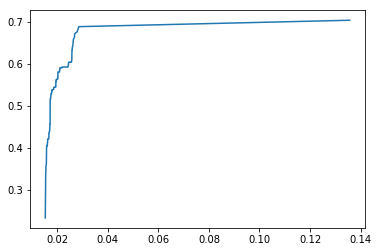

In [23]:
jeca.plot(sensibilidade,especificidade)
jeca.show()

___
## 5. Qualidade do Classificador alterando a base de treinamento

def repeat(dados,setenta_cinco):
    dados = dados.iloc[np.random.permutation(len(dados))]
    dados_treino = dados.iloc[:setenta_cinco]
    dados_teste = dados.iloc[setenta_cinco:num]
    dados_reais = dados.iloc[setenta_cinco:num]
    dados_teste = dados_teste.Email.values
    Spam = dados_treino.Email[dados_treino.Class == 'spam'].values
    Ham = dados_treino.Email[dados_treino.Class == 'ham'].values
    Pspam = (dados_treino.Email[dados_treino.Class == 'spam'].count()/dados_treino.Email.count())
    Pham = (dados_treino.Email[dados_treino.Class == 'ham'].count()/dados_treino.Email.count())
    spam_words = []
    ham_words = []
    i = 0
    while i < len(Spam):
        word = Spam[i].split()
        for j in word:
            if j.isdigit == True:
                pass
            if len(j) <= 3:
                pass
            else:
                spam_words.append(j)
        i+=1
    i = 0
    while i < len(Ham):
        word = Ham[i].split()
        for j in word:
            if j.isdigit == True:
                pass
            if len(j) <= 3:
                pass
            else:
                ham_words.append(j)
        i+=1
    spam_dic = {}
    for i in spam_words:
        n = 1
        if i in spam_dic:
            pass
        else:   
            for j in spam_words:
                if i == j:
                    n += 1
                else:
                    pass
            spam_dic[i] = (n + 1)/(len(spam_words)*2 + len(ham_words))
    ham_dic = {}
    for i in ham_words:
        n = 1
        if i in ham_dic:
            pass
        else:   
            for j in ham_words:
                if i == j:
                    n += 1
                else:
                    pass
            ham_dic[i] = (n + 1)/(len(ham_words)*2 + len(spam_words))
    teste = []
    for i in dados_teste:
        teste.append(i)
    dados_teste = teste
    roc = 0.7
    tudo_certo = classificando(dados_teste,spam_dic,ham_dic,Pspam,Pham,roc)
    results = []
    for i in dados_teste:
        results.append(tudo_certo[i])
    df_meus = pd.DataFrame({
        'Class' : results,
        'Emails' : dados_teste
    })
    valores_reais = dados_reais.Class.values
    df_comp = pd.DataFrame({
        'Minhas' : results,
        'Reais' : valores_reais
    })
    spam_spam = df_comp.Minhas[(df_comp.Minhas == 'spam') & (df_comp.Reais == 'spam')].count()
    spam_ham = df_comp.Minhas[(df_comp.Minhas == 'spam') & (df_comp.Reais == 'ham')].count()
    ham_ham = df_comp.Minhas[(df_comp.Minhas == 'ham') & (df_comp.Reais == 'ham')].count()
    ham_spam = df_comp.Minhas[(df_comp.Minhas == 'ham') & (df_comp.Reais == 'spam')].count()
    
    return spam_spam , spam_ham , ham_ham , ham_spam

Glazz = 1000
i = 0

lista_spam_spam = []
lista_spam_ham = []
lista_ham_ham = []
lista_ham_spam = []

while i<Glazz:
    n_spam_spam,n_spam_ham,n_ham_ham,n_ham_spam = repeat(dados,setenta_cinco)
    lista_spam_spam.append(n_spam_spam)
    lista_spam_ham.append(n_spam_ham)
    lista_ham_ham.append(n_ham_ham)
    lista_ham_spam.append(n_ham_spam)
    i = i + 1